# Temperature Range Animation Creator (TRAC)

### Created by: Matthew Gonzalez
SIO 113 Instructor: Dave May

**Background**
- This program plots, saves, and animates global temperature data
- Temperature data is displayed as a heat contour map
    - Colors plotted display temperature range ($T_{max}$ - $T_{min}$  ) per month in ˚C.
- The dataset "consists of a spatially gridded (5° × 5°) global surface temperature dataset, with monthly resolution from January 1880 to present".$^{[1]}$
- For further research, inspect the data set online here:
    - https://www.ncdc.noaa.gov/cag/global/time-series
    - Select "Mapping" to see the complete surface data for a given month over the surface of the Earth.


In [1]:
import netCDF4 as nc4 #dataset is netCDF4 datatype
from IPython.display import Image #retrieve fig animations

%matplotlib inline
import warnings 
# this will allow us to use the code without warnings 
warnings.filterwarnings("ignore")

In [2]:
#read in dataset
fn = 'NOAAGlobalTemp.nc' #dataset only includes dates up to when it was downloaded
ds = nc4.Dataset(fn) #dataset read as netCDF4


**The `anom` module**
- This module contains functions to plot, save, and animate temperature ranges over time
- **Functions**
    - `map_var(ds,res)`
    - `map2png(lon,lat,temp,year, year_range,**kwargs)`
    - `animate_map(spf)`
    
- For more information, use the `help(anom)` function

In [3]:
#import temperature anomoly module
import anom
from importlib import reload
reload(anom); #this allows us to use anom even if we change something in it


**Function:** 
`map_var(ds,res)`
- This function creates mappable variables from the original dataset
- `ds` is the dataset (as a netCDF4 file)
- `res` is the resolution of frames (valid from 1 to 1695)
    - lower values have greater resolution (and create more files)
    - resolutions below 100 take a significant time to load and may be unable to animate

In [4]:
#retrieve plot data from dataset
res = 100 #resolution
lon,lat,temp,year,year_range = anom.map_var(ds,res)
#variables returned are used for map2png function


**Function:** 
`map2png(lon,lat,temp,year, year_range,**kwargs)`
- This function plots maps and saves them as png files in the `Fig` directory
- `lon` is a (72,) shaped array of longitude values
- `lat` is a (36,) shaped array of latitude values
- `temp` is a (142, 36, 72) shaped array of temperature values
- `year` is a (1696) length list of years from 1800 to 2021
- `year_range` is an array of variable length determined by `res`
- `**kwargs` is for map projection type. Valid entries include: 
    - proj='Lambert Conformal', proj='Orthographic', proj='Mollweide', proj='Mercator'
    - Orthographic is the default, and will be displayed if an unlisted proj type is attempted

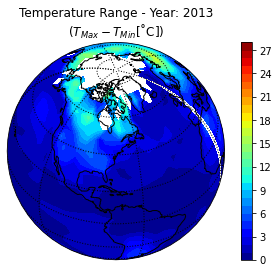

In [5]:
#create png files for every figure
proj_type = 'Orthographic' #projection type
anom.map2png(lon,lat,temp,year,year_range,proj=proj_type)


**Function:** 
`animate_map(spf)`
- This function creates an animation from figures created with `map2png`
- `spf` is seconds per frame. Smaller values create faster animations

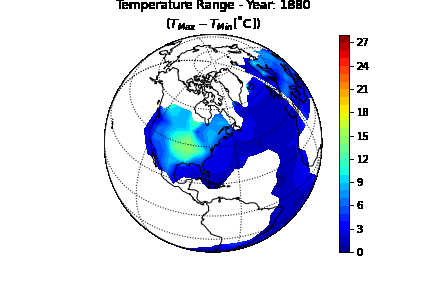

In [6]:
#display animation
spf = 0.2 #input resolution in sec/frame
anom.animate_map(spf)


In [7]:
# #UNCOMMENT BELOW TO DELETE FIG DIRECTORY TO CREATE DIFFERENT PROJ
# import shutil
# shutil.rmtree('Fig/', ignore_errors=False)

**Conclusions**
- Regardless of resolution or projection type, there are two visible trends:
    - There are greater temperature ranges at high latitudes (NH). A potential reason may be the obliquity of Earth's orbit impacting location of solar insolation.
    - There are greater temperature ranges on continents than on oceanic plates. This may be due to the temperature regulating properties of the ocean, as well as circulation patterns.

**Future Additions**
- customize central latitude and longitude
- customize color bar
- option to create single figure (instead of animation)

**Notes**
- White on figure plots indicate missing data entries, and do not indicate any form of useful data.
- High concentration of missing data in South Pole requires further research or supplemental data. 
- High concentration of missing data in early measurements.
- Figures or animations may be downloaded from the `Fig` directory.
    - Files will be unretrievable if directory is deleted by running code above.

**References**

[1] NOAAGlobalTemp v5 Dataset:
- https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp
